# Sheet 4

In [4]:
import numpy as np                # basic arrays, vectors, matrices
import scipy as sp                # matrix linear algebra 

import matplotlib                 # plotting
import matplotlib.pyplot as plt   # plotting
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>""");

- - -

<div class="alert alert-info">

### Projections in 3D
</div>

In the lecture, we discussed how to project vectors onto subspaces. In this exercise we try the idea by projecting a 3D parametric curve on a plane. In general, parameteric curves are given as 

\begin{eqnarray}
x_1 & = & x_1(t) \\
x_2 & = & x_2(t) \\
x_3 & = & x_3(t)
\end{eqnarray}

As an example, the equation of a helix on the cylinder $x_2^2 + x_3^2 = 1$ is given by
\begin{eqnarray}
x_1 & = & t \\
x_2 & = & \cos(2t) \\
x_3 & = & \sin(2t)
\end{eqnarray}

Below, we define such a helix and plot it

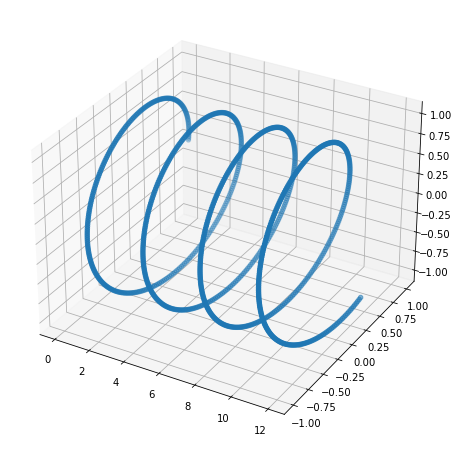

In [2]:
# we define the coordinates of a helix 
N = 1000
t = np.linspace(0, 12, N)
x1 = t
x2 = np.cos(2*t)
x3 = np.sin(2*t)
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, x3)


Using parameterized curves, one can generate more fancy shapes: 

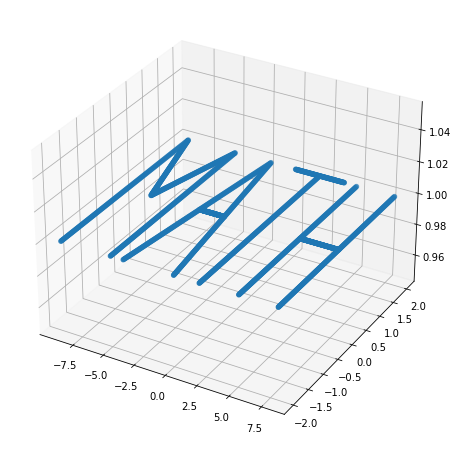

In [3]:
N = 2456
t = np.linspace(0, 12, N)
x1 = 3/2*t + abs(t-1) - abs(t-3) + abs(t-4) + abs(t-7) - 2*abs(t-8) + 1.5* abs(t-11) \
   + 0.5 * (abs(t-4)/(t-4)  - 3*abs(t-6)/(t-6) + abs(t-7)/(t-7)  - 2*abs(t-8)/(t-8) ) \
   + 0.5 * (3*abs(t-9)/(t-9) +  3*abs(t-10)/(t-10) - 3*abs(t-11)/(t-11)   )   - 37/2


x2 = 2*t - 3*abs(t-1) + 2*abs(t-2) - 3*abs(t-3) + 4*abs(t-4) - 4*abs(t-5) + 2*abs(t-6) - 2*abs(t-8)+ 2*abs(t-11) \
   + abs(t-6)/(t-6)+ abs(t-7)/(t-7) + 2*abs(t-9)/(t-9) + 2*abs(t-10)/(t-10) +abs(t-11)/(t-11)-1

x3 = N*[1.0]
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, x3)

On the other hand, the coordinate of a point on a plane in 3D coordinate system is given by
\begin{equation}
\mathbf{x} = (x_1, x_2, x_3)^\top = \mathbf{r_0} + \alpha \mathbf{v_1} + \beta \mathbf{v_2},
\end{equation}
where $\mathbf{r_0},\mathbf{v_1},\mathbf{v_2}$ are vectors and $\alpha, \beta$ are real numbers. Note that the vectors $\mathbf{v_1},\mathbf{v_2}$ span a subspace (a plane), which goes through the origin. The vector $\mathbf{r_0}$ shifts that plane in the coordinate sytem.  

<div class="alert alert-success">

**Task**: Complete the function `project_points_on_a_surface` below to implement the projection on a plane, given the coordinate matrix `C`, which holds the three coordinates of each point in its three rows. Note that each point is a column of this matrix. The function should have the following properties:
- The function should check whether v1 and v2 are linearly independent. If this is not the case it should terminate with error.
- Within the function body, a projection matrix P should be calculated (using the input arguments of the function). This matrix is then used to perform the projection.
- The function should return the coordinates of the projected points as a matrix. The input paramaters of the function are the coordinate matrix of input points, the vectors r0,v1 and v2 that are used to parameterize the projection plane. 
- Note: You may use standard functions like the numpy.linalg.inv
</div>

[[-9.00000000e+00 -9.00000000e+00 -9.00000000e+00 ...  7.97067210e+00
   7.98533605e+00  8.00000000e+00]
 [-2.00000000e+00 -1.98044807e+00 -1.96089613e+00 ...  3.55271368e-15
  -3.55271368e-15  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]


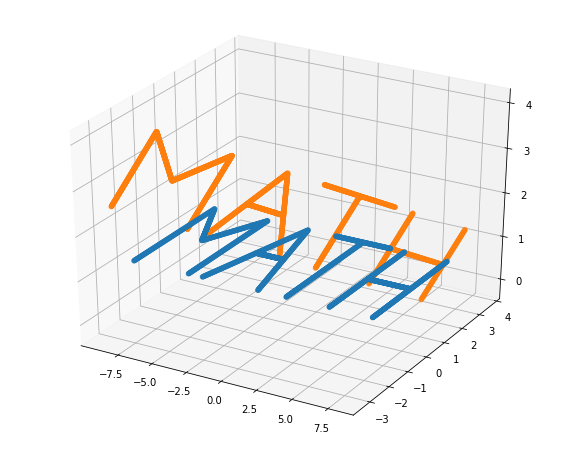

In [7]:
# we fill the matrix C with coordinate arrays 
C = np.array([x1,x2,x3])

def project_points_on_a_surface(C, r0, v1, v2):
    """project the curve onto the surface parameterized by v1 and v2"""    

    # TODO
    
    
    return Cprojected


r0 = np.array([0,0,1])
v1 = np.array([1,2,3])
v2 = np.array([1,1,1])


Cprojected = project_points_on_a_surface(C,r0,v1,v2)

# now we plot the projected coordinates along with the original coordinates 
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(C[0,:], C[1,:], C[2,:])
ax.scatter(Cprojected[0,:], Cprojected[1,:], Cprojected[2,:])



<div class="alert alert-info">
    
### Least Squares Regression 
</div>

As discussed in the course, the least squares method can be used to solve overdetermined systems (these have more equations than unknowns). The method has usage in many applications, especially in statistics and machine learning. In this exercise, we try it in the context of machine learning (ML).

In this task, the goal is to develop a predictive ML model based on the so-called Boston Housing data. The dataset can be found in the UCI Machine Learning Repository. The data was collected in 1970s and each entry (each row in the data) represents information about different features of homes from various suburbs located in Boston. Let's load the data and take a first look.

<div class="alert alert-danger">
    
**Note:** Please download the file `Boston_Housing_Data.csv` from the OLAT materials folder, and put it in the same directory as this notebook.
</div>

In [ ]:
from numpy import genfromtxt
housingData = genfromtxt('Boston_Housing_Data.csv', delimiter=',')
NumberOfSamples = housingData.shape[0]
NumberOfFeatures = housingData.shape[1]
print('Boston Housing Data:',housingData)
print('The data has', NumberOfSamples, 'samples.')
print('Each sample has', NumberOfFeatures, 'features')


After loading, we can observe that the `housingData` array contains 506 samples (rows). Each sample represents a house and has 14 features (columns in the data). The features are like:
- capita crime rate 
- index of accessibility to radial highways
- pupil-teacher ratio by town
- ...

and so on. 

What is most important to us is the last feature (last column in the data), namely the price of the house in thousand dollars (do not surprise much, these are 70s prices!). Our aim is to develop a model, which can predict the value of any house. For this exercise, we choose the linear model for the price denoted by $p$:

\begin{equation}
p(\mathbf{x}) = w_0 + w_1 * x_1 + w_2 * x_2 + \ldots + w_{13}* x_{13}, 
\end{equation}

where the vector $\mathbf{w} = (w_0,w_1,\ldots, w_{13})^\top$ are the weights of the model and the vector $\mathbf{x} = (x_1,x_2, \ldots, x_{13})^\top$ is the features vector. To account for the bias term $w_0$, we can add $x_0=1$ to the features vector such that the price function is simply a scalar product:

\begin{equation}
p(\mathbf{x}) = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + \ldots + w_{13}* x_{13} = \mathbf{w}^\top \mathbf{x}, 
\end{equation}

Our price model can predict the value of any house if its other $13$ features are known. The crucial issue is now to adjust the model weights in such way that our model performs well for the new samples, which are not in the data. To find the best values for the weights, we take $N$ sample points from the data (these we call training samples in the following) and try to fit the linear price function such that it provides exact interpolations at those points. Therefore, for each sample we can write a linear equation:

\begin{eqnarray}
w_0 * x_0^{(1)} + w_1 * x_1^{(1)} + w_2 * x_2^{(1)} + \ldots + w_{13}* x_{13}^{(1)} & = & p(\mathbf{x}^{(1)}) \\
w_0 * x_0^{(2)} + w_1 * x_1^{(2)} + w_2 * x_2^{(2)} + \ldots + w_{13}* x_{13}^{(2)} & = & p(\mathbf{x}^{(2)}) \\
\vdots \quad \quad \quad \quad \vdots & & \vdots \\
w_0 * x_0^{(N)} + w_1 * x_1^{(N)} + w_2 * x_2^{(N)} + \ldots + w_{13}* x_{13}^{(N)} & = & p(\mathbf{x}^{(N)})
\end{eqnarray}

The superscript $(i)$ denotes the index of the particular sample, e.g., $x_3^{(11)}$ means the $x_3$ from the $11$th sample. In matrix form we can write the above linear system as

\begin{equation}
X \mathbf{w} = \mathbf{p},
\end{equation}

with the coefficient matrix

\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_{13}^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \ldots & x_{13}^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(N)} & x_2^{(N)} & \ldots & x_{13}^{(N)}
\end{bmatrix}.
\end{equation}

Note that for $N>14$ this linear system is overdetermined and it is very unlikely that we can find a solution in the classical sense. However, as we have learnt in the lecture, overdetermined systems can be solved using the least squares method. Finding this least square solution is precisely the task in this exercise.

As you might have noted, we have in total $506$ samples in the data. We use $N=400$ samples for the linear system. The rest $106$ samples will be used to evaluate the performance our model.

In [ ]:
N = 400
trainingData = housingData[0:N,:]
testData = housingData[N:NumberOfSamples,:]

<div class="alert alert-success">

**Task**: Implement the functions `find_weights` and `estimate_price` below
- The function find_weights should find the least square solution for the problem $X\mathbf{w} = \mathbf{p}$
- The function `estimate_price` should simply return a price value for given $\mathbf{w}$ and $\mathbf{x}$.
- Note: You may use standard functions like the numpy.linalg.inv but do not use numpy.linalg.lstsq
- Note: Do not forget the column of ones in the $X$ matrix (for the bias term)
</div>

In [ ]:
def find_weights(trainingData):
   
    # TO DO
    
   
    
    
    return weights

def estimate_price(weights,x):
    
    # TO DO
    
    
    
    
    return price

Now we are ready to try our model with the test data. First we calculate the weight vector by calling the function 
`find_weights` with the `trainingData`:

In [ ]:
weights = find_weights(trainingData)

In the next step, we try our model on the `testData` and calculate the mean squared error (MSE) of our estimations:

In [ ]:
MSE = 0.0
for sample in testData:
  x = sample[0:NumberOfFeatures-1]  
  x = np.append([1.0],x)                
                               
  estimatedPrice = estimate_price(weights,x)
  truePrice = sample[NumberOfFeatures-1]  
  print('estimated price = ',estimatedPrice, 'true price = ',truePrice)
  MSE = MSE + (estimatedPrice-truePrice)**2.0  

MSE = MSE/(NumberOfSamples-N)
print('Mean Squared Error for the test data = ',MSE)